In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df=pd.read_csv("C:/Users/91620/OneDrive/Desktop/EXCEL/college_student_placement_dataset.csv")

In [3]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


#cheaking Outliers 

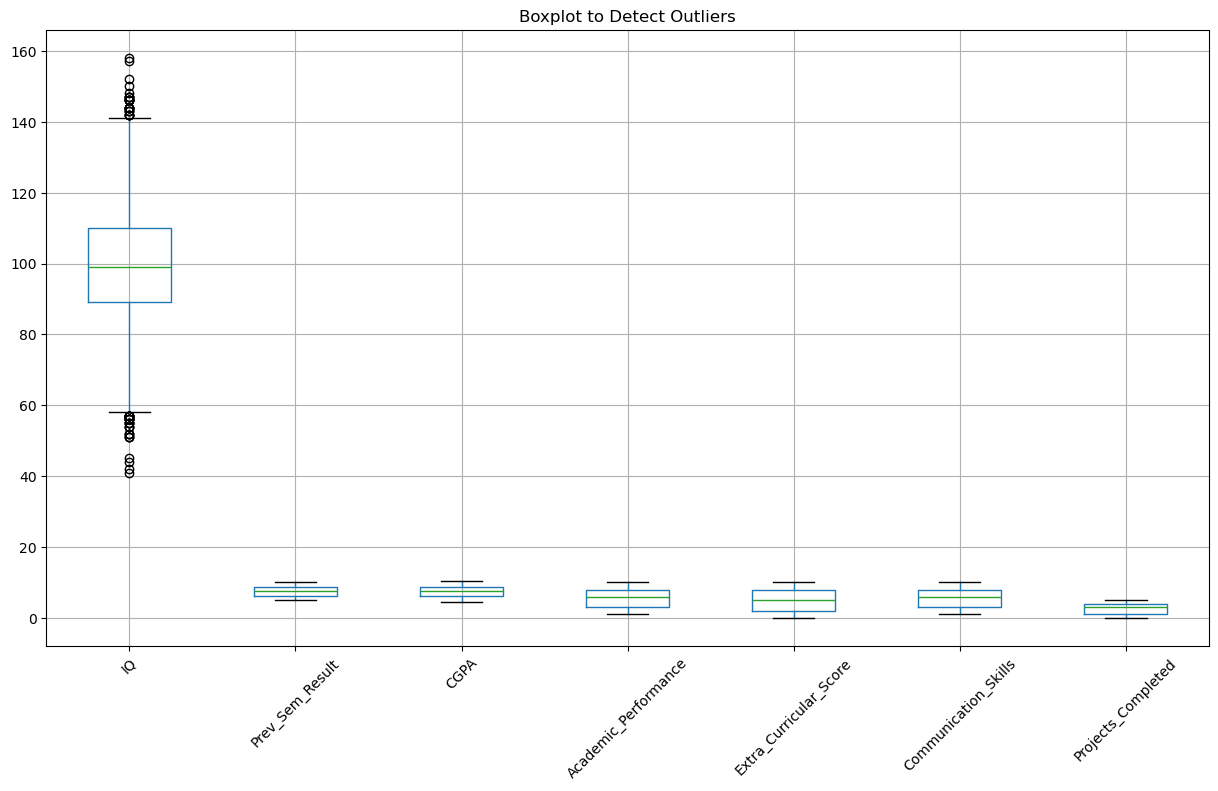

In [5]:
numeric_cols = df.select_dtypes(include='number').columns

# Use boxplots to visualize outliers
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

#labeling the IQ feature

In [6]:
bins = [0, 90, 110, 200]  # Upper limit is higher than any possible IQ
labels = ['Low', 'Average', 'High']

df['IQ_Level'] = pd.cut(df['IQ'], bins=bins, labels=labels)


In [7]:
print(df[['IQ', 'IQ_Level']].head())
print(df['IQ_Level'].value_counts())


    IQ IQ_Level
0  107  Average
1   97  Average
2  109  Average
3  122     High
4   96  Average
IQ_Level
Average    4964
Low        2752
High       2284
Name: count, dtype: int64


# Encode the 'Yes'/'No' values to 1/0

In [8]:

df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,IQ_Level
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0,Average
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0,Average
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0,Average
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0,High
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0,Average


#feature  Selection numeric columns only

In [9]:

numeric_df = df.select_dtypes(include='number')

# View columns
print(numeric_df.columns)
# Compute correlation
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

Index(['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')
                              IQ  Prev_Sem_Result      CGPA  \
IQ                      1.000000        -0.002640 -0.002859   
Prev_Sem_Result        -0.002640         1.000000  0.980768   
CGPA                   -0.002859         0.980768  1.000000   
Academic_Performance   -0.006827        -0.005765 -0.002958   
Internship_Experience  -0.000247        -0.013347 -0.012562   
Extra_Curricular_Score -0.003458         0.009326  0.011441   
Communication_Skills   -0.010896        -0.017269 -0.018242   
Projects_Completed      0.014538         0.018434  0.020872   
Placement               0.285914         0.317896  0.321607   

                        Academic_Performance  Internship_Experience  \
IQ                                 -0.006827              -0.000247   
Prev_Sem_Result 

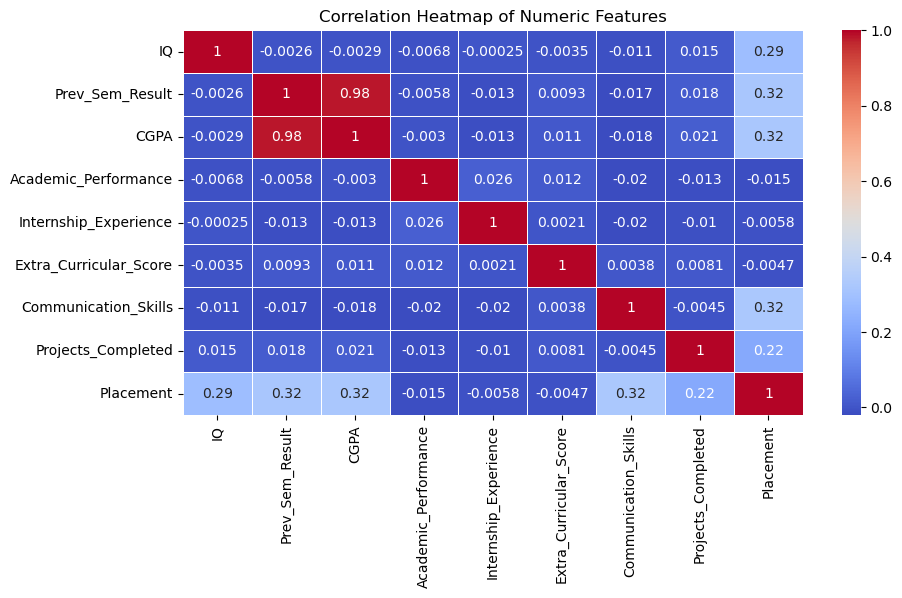

In [61]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [16]:
# Selecting  features and target
features = ['CGPA', 'Prev_Sem_Result', 'IQ', 'Communication_Skills', 'Projects_Completed']
X = df[features]
y = df['Placement']

In [19]:
from sklearn.model_selection import train_test_split


In [33]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [38]:
y_pred = model.predict(X_test_scaled)


In [39]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[1607   67]
 [ 126  200]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1674
           1       0.75      0.61      0.67       326

    accuracy                           0.90      2000
   macro avg       0.84      0.79      0.81      2000
weighted avg       0.90      0.90      0.90      2000

Accuracy: 0.9035


In [40]:
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)


                Feature  Coefficient
3  Communication_Skills     1.863582
2                    IQ     1.615993
0                  CGPA     1.585771
4    Projects_Completed     1.172335
1       Prev_Sem_Result     0.213504


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [42]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree:")
print(classification_report(y_test, dt_pred))


Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1674
           1       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [43]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, rf_pred))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1674
           1       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [44]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print("K-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1674
           1       0.96      0.93      0.95       326

    accuracy                           0.98      2000
   macro avg       0.97      0.96      0.97      2000
weighted avg       0.98      0.98      0.98      2000



In [45]:
svm_model = SVC(kernel='rbf')  # You can try 'linear' as well
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
print("Support Vector Machine:")
print(classification_report(y_test, svm_pred))


Support Vector Machine:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1674
           1       0.93      0.87      0.90       326

    accuracy                           0.97      2000
   macro avg       0.95      0.93      0.94      2000
weighted avg       0.97      0.97      0.97      2000



In [46]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes:")
print(classification_report(y_test, nb_pred))


Naive Bayes:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1674
           1       0.75      0.64      0.69       326

    accuracy                           0.91      2000
   macro avg       0.84      0.80      0.82      2000
weighted avg       0.90      0.91      0.90      2000



In [47]:
models = {
    "Logistic Regression": y_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "KNN": knn_pred,
    "SVM": svm_pred,
    "Naive Bayes": nb_pred
}

for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    print(f"{name}: Accuracy = {acc:.2f}")


Logistic Regression: Accuracy = 0.90
Decision Tree: Accuracy = 1.00
Random Forest: Accuracy = 1.00
KNN: Accuracy = 0.98
SVM: Accuracy = 0.97
Naive Bayes: Accuracy = 0.91


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
# Dictionary of model names and predictions
models = {
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "KNN": knn_pred,
    "SVM": svm_pred,
    "Naive Bayes": nb_pred
}

# Store accuracy scores
accuracies = {name: accuracy_score(y_test, preds) for name, preds in models.items()}


C:\Users\91620\AppData\Local\Temp\ipykernel_6172\2905019148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


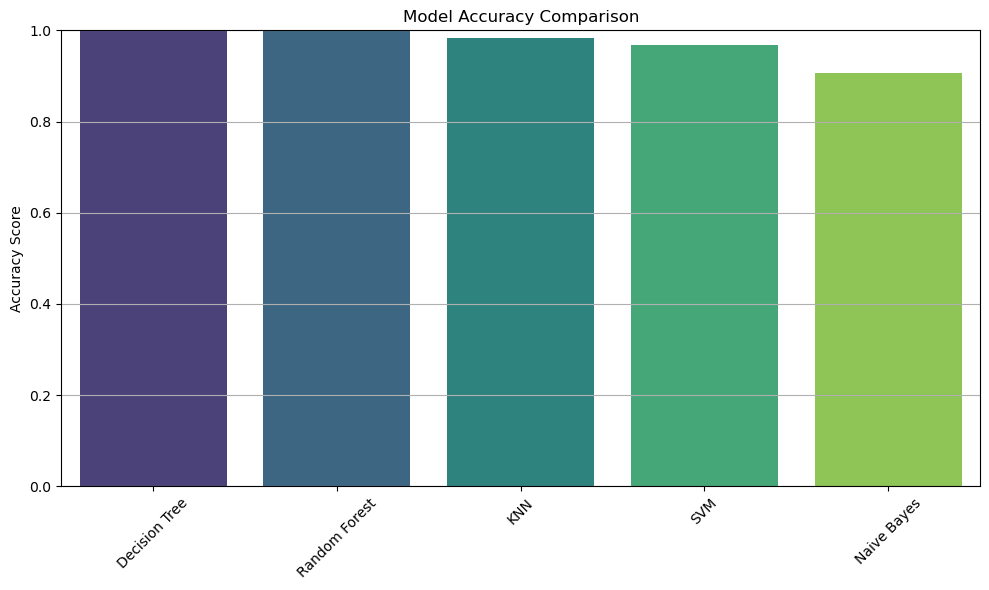

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


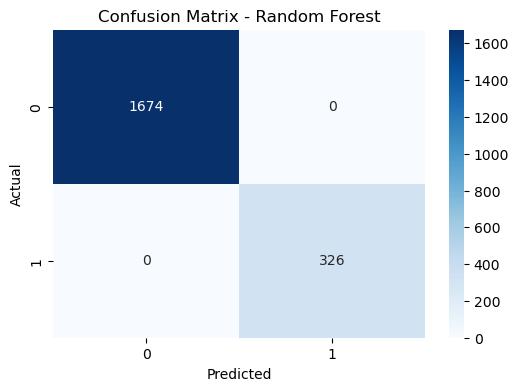

In [51]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])
 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=16)


Epoch 1/50


C:\Users\91620\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8881 - loss: 0.2665 - val_accuracy: 0.9290 - val_loss: 0.1795
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9205 - loss: 0.1891 - val_accuracy: 0.9430 - val_loss: 0.1516
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9361 - loss: 0.1574 - val_accuracy: 0.9560 - val_loss: 0.1243
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9438 - loss: 0.1415 - val_accuracy: 0.9620 - val_loss: 0.1075
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9542 - loss: 0.1212 - val_accuracy: 0.9700 - val_loss: 0.0866
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9589 - loss: 0.1120 - val_accuracy: 0.9755 - val_loss: 0.0778
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9630 - loss: 0.0995 - val_accuracy: 0.9810 - val_loss: 0.0705
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9672 - loss: 0.0884 - val_accuracy: 0.9800 - val_

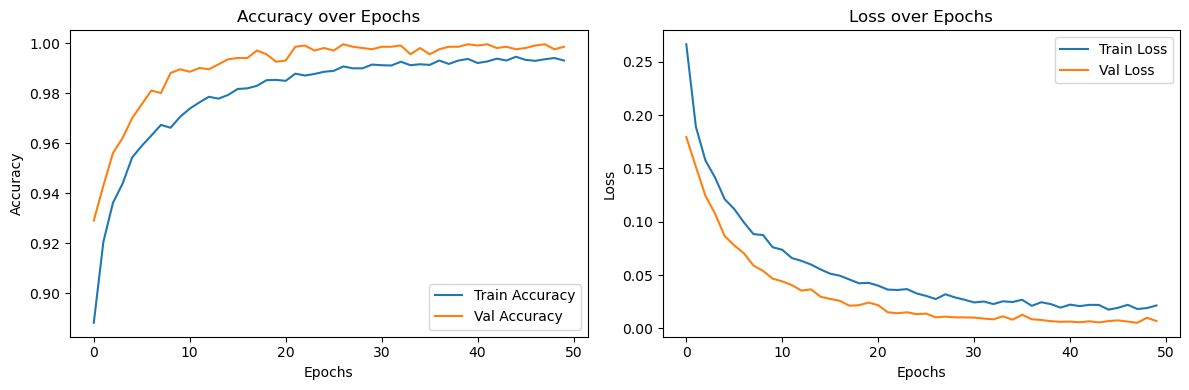

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
Accuracy: 99.85000000000001

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1674
           1       1.00      0.99      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



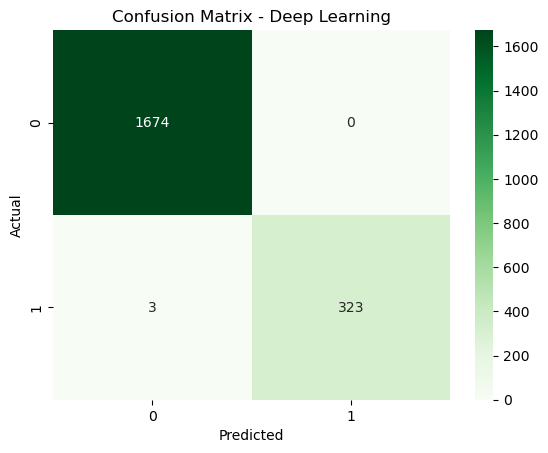

In [58]:
# Predict class probabilities and convert to 0 or 1
y_pred_dl = model.predict(X_test_scaled)
y_pred_class = (y_pred_dl > 0.5).astype(int)

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_class)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

# Confusion Matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Deep Learning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [57]:
#Accuracy = (TP + TN) / Total = (1674 + 323) / 2000 = 1997 / 2000 = 0.9985 (≈ 99.85%)
